# HSV

- H - 色调（主波长）。 
- S - 饱和度（纯度/颜色的阴影）。 
- V值（强度）

    hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)

# 图像阈值

    ret,dst = cv2.threshold(src,thresh,maxval,type)
+ src: 输入图
+ dst: 输出图
+ thresh: 阈值
+ maxval: 当像素值超过了阈值（或小于阈值，根据type来决定），所赋予的值
+ type: 二值化操作的类型，包含5种类型：

 二值
 + cv2.THRESH_BINARY: 超过阈值部分取maxval，否则取0
 + cv2.THRESH_BINARY_INV: THRESH_BINARY的反转
 
 截断值
 
 + cv2.THRESH_TRUNC: 大于阈值部分设为阈值，否则不变
 
 暗点变0(tozero)
 
 + cv2.THRESH_TOZERO: 大于阈值部分不改变，否则设为0
 + cv2.THRESH_TOZERO_INV: THRESH_TOZERO的反转

In [1]:
import cv2 # opencv默认读取格式是BGR的而不是RGB
import matplotlib.pyplot as plt
import numpy as np
# 魔法指令notebook中不必调用plt.show()函数了
%matplotlib inline

In [2]:
img = cv2.imread('cat.jpg')
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img_gray.shape

(414, 500)

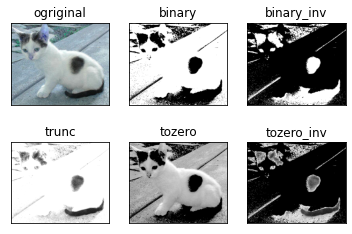

In [3]:
ret,thresh1 = cv2.threshold(img_gray,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img_gray,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img_gray,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img_gray,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img_gray,127,255,cv2.THRESH_TOZERO_INV)

titles = ['ogriginal','binary','binary_inv','trunc','tozero','tozero_inv']
images = [img,thresh1,thresh2,thresh3,thresh4,thresh5]

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

# 图像平滑（滤波）

In [4]:
img = cv2.imread("lenaNoise.png")
cv2.imshow('lenaNoise',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 均值滤波

In [5]:
# 简单的平均卷积操作
# blur：模糊、失去焦点
blur = cv2.blur(img,(3,3))
cv2.imshow('blur',blur)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 方框滤波

In [6]:
# 基本和均值滤波一样，可以选择归一化
# -1: 颜色通道表示一致
# (3,3)卷积核尺寸
# normalize：不归一化的话可能越界、归一化后和均值滤波一样
box = cv2.boxFilter(img,-1,(3,3),normalize=True)
cv2.imshow('box',box)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:
# 越界的像素点全取255，所以图像白色比较多
box = cv2.boxFilter(img,-1,(3,3),normalize=False)
cv2.imshow('box',box)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 高斯滤波

In [8]:
# 高斯模糊的卷积核里的数值是满足高斯分布，相当于更重视中间的
aussian = cv2.GaussianBlur(img,(5,5),1)
cv2.imshow('高斯滤波',aussian)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 中值滤波

In [9]:
# 相当于用中值代替（区域内排序后的中值）
# 效果很好
median = cv2.medianBlur(img,5)
cv2.imshow('medianBlur',median)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [10]:
## 展示所有的
# 均值、高斯、中值
res = np.hstack((blur,aussian,median))
# res = np.vstack((blur,aussian,median))
cv2.imshow('median vs average',res)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 形态学（morphology）

## 腐蚀操作

In [11]:
# 腐蚀操作一般是2值的
# 腐蚀：领域被蚕食
# 将图像中的高亮区域或白色部分进行缩减细化,其运行结果图比原图的高亮区域更小.
img = cv2.imread('dige.png')
cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [12]:
kernel = np.ones((5,5),np.uint8)
# iterations：迭代次数
erosion = cv2.erode(img,kernel,iterations=1)
cv2.imshow('erosion',erosion)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [13]:
pie = cv2.imread('pie.png')
kernel = np.ones((30,30),np.uint8)
erosion_1 = cv2.erode(pie,kernel,iterations=1)
erosion_2 = cv2.erode(pie,kernel,iterations=2)
erosion_3 = cv2.erode(pie,kernel,iterations=3)
res = np.hstack((erosion_1,erosion_2,erosion_3))
cv2.imshow("res",res)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 膨胀操作

In [14]:
# 腐蚀的逆操作
img = cv2.imread('dige.png')

In [15]:
dige_erosion = cv2.erode(img,kernel,iterations=1)
cv2.imshow('erosion',erosion)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [16]:
kernel = np.ones((3,3),np.uint8)
dige_dilate = cv2.dilate(dige_erosion,kernel,iterations=1)
cv2.imshow('dilate',dige_dilate)
cv2.waitKey(0)
cv2.destroyAllWindows()
# 图像线条变粗了

In [17]:
pie = cv2.imread('pie.png')
kernel = np.ones((30,30),np.uint8)
dilate_1 = cv2.dilate(pie,kernel,iterations=1)
dilate_2 = cv2.dilate(pie,kernel,iterations=2)
dilate_3 = cv2.dilate(pie,kernel,iterations=3)
res = np.hstack((dilate_1,dilate_2,dilate_3))
cv2.imshow("res",res)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 开运算与闭运算

## 开：先腐蚀再膨胀

In [18]:
# morph： (使) 改变
img = cv2.imread('dige.png')
kernel = np.ones((5,5),np.uint8)
opening = cv2.morphologyEx(img,cv2.MORPH_OPEN,kernel)
cv2.imshow("opening",opening)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 闭：先膨胀再腐蚀

In [19]:
img = cv2.imread('dige.png')
kernel = np.ones((5,5),np.uint8)
closing = cv2.morphologyEx(img,cv2.MORPH_CLOSE,kernel)
cv2.imshow("closing",closing)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 梯度运算

In [20]:
# 梯度 = 膨胀 - 腐蚀
pie = cv2.imread('pie.png')
kernel = np.ones((7,7),np.uint8)
dilate = cv2.dilate(pie,kernel,iterations=5)
erosion = cv2.erode(pie,kernel,iterations=5)
res = np.hstack((dilate,erosion))
cv2.imshow("res",res)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [21]:
# morphology: 形态学
gradient = cv2.morphologyEx(pie,cv2.MORPH_GRADIENT,kernel)
cv2.imshow("gradient",gradient)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 礼帽和黑帽

+ 礼帽：原始输入(带刺) - 开运算结果（不带刺），所以结果只剩下刺了
+ 黑帽：闭运算结果（粗刺） - 原始输入（细刺），结果刺几乎没有，剩下原始图片轮廓

In [22]:
img = cv2.imread('dige.png')
tophat = cv2.morphologyEx(img,cv2.MORPH_TOPHAT,kernel)
blackhat = cv2.morphologyEx(img,cv2.MORPH_BLACKHAT,kernel)
res = np.hstack((tophat,blackhat))
cv2.imshow("tophat & blackhat",res)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 图像梯度

## Sobel算子

In [23]:
# 检测边缘
img = cv2.imread('pie.png',cv2.IMREAD_GRAYSCALE)
cv2.imshow("img",img)
cv2.waitKey()
cv2.destroyAllWindows()

    dst = cv2.Sobel(src,ddepth,dx,dy,ksize)
+ ddepth:图像深度，一般-1就可以
+ dx和dy：表示水平和数值方向
+ ksize：Sobel算子的大小

In [24]:
def cv_show(img,name):
    cv2.imshow(name,img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [25]:
# 右边减左边，从下减上
# 白到黑是正数、黑到白就是负数了，所有负数会被截断成0，所以要取绝对值
# cv2.CV_64F能表示负数
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
cv_show(sobelx,'sobelx')

In [26]:
# dx = 1,dy = 0表示算水平的，不去算竖直的
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
sobelx = cv2.convertScaleAbs(sobelx)
cv_show(sobelx,'sobelx')
# dx = 0,dy = 1表示相反
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)
sobely = cv2.convertScaleAbs(sobely)
cv_show(sobely,'sobely')

In [27]:
# 分别计算x和y、再求和
sobelxy = cv2.addWeighted(sobelx,0.5,sobely,0.5,0)

# 不建议直接计算 dx = 1 ,dy =1
sobelxy_ = cv2.Sobel(img,cv2.CV_64F,1,1,ksize=3)
sobelxy_ = cv2.convertScaleAbs(sobelxy_)

sobelxys = np.hstack((sobelxy,sobelxy_))
cv2.imshow(' vs  ',sobelxys)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [28]:
# lena图像展示效果
img = cv2.imread('lena.jpg',cv2.IMREAD_GRAYSCALE)

# 1.分别计算
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
sobelx = cv2.convertScaleAbs(sobelx)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)
sobely = cv2.convertScaleAbs(sobely)
sobelxy = cv2.addWeighted(sobelx,0.5,sobely,0.5,0)

# 2.直接计算（不建议）
sobelxy_ = cv2.Sobel(img,cv2.CV_64F,1,1,ksize=3)
sobelxy_ = cv2.convertScaleAbs(sobelxy_)

sobelxys = np.hstack((img,sobelxy,sobelxy_))
cv_show(sobelxys,'0 vs 1 vs 2')

## Scharr算子

## laplacian(拉普拉斯)算子


In [29]:
# 不同算子的差异
img = cv2.imread('lena.jpg',cv2.IMREAD_GRAYSCALE)

sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)
sobelx = cv2.convertScaleAbs(sobelx)
sobely = cv2.convertScaleAbs(sobely)
sobelxy = cv2.addWeighted(sobelx,0.5,sobely,0.5,0)

scharrx = cv2.Scharr(img,cv2.CV_64F,1,0)
scharry = cv2.Scharr(img,cv2.CV_64F,0,1)
scharrx = cv2.convertScaleAbs(scharrx)
scharry = cv2.convertScaleAbs(scharry)
scharrxy = cv2.addWeighted(scharrx,0.5,scharry,0.5,0)

laplacian = cv2.Laplacian(img,cv2.CV_64F)
laplacian = cv2.convertScaleAbs(laplacian)

res = np.hstack((sobelxy,scharrxy,laplacian))
cv_show(res,'res')

# Canny边缘检测

1. 使用`高斯滤波器`，以平滑图像，滤除噪声
2. 计算图像中每个像素点的梯度强度与方向
3. 应用非极大值抑制（Non-Maxumum Suppression），以消除边缘检测带来的杂散影响
4. 应用双阈值（Double-Threshold）检测来确定真实和潜在的边缘
5. 通过抑制孤立的弱边缘完成边缘检测

In [30]:
# 高斯滤波器：中间点比较大，越边缘点越小、归一化
# 梯度和方向使用Sober算子
# 非极大值抑制：比较当前这个点和周围两个点之间梯度幅值的大小，保存最大的
# 双阈值检测：minVal,maxVal
# 梯度值＞maxVal则处理为边界
# minVal<梯度值<maxVal，连有边界则保留，否则舍弃
# 梯度值<minVal，舍弃
img = cv2.imread('lena.jpg',cv2.IMREAD_GRAYSCALE)
v1 = cv2.Canny(img,80,150)
v2 = cv2.Canny(img,50,100)
res = np.hstack((v1,v2))
cv_show(res,'res')

img = cv2.imread('car.png',cv2.IMREAD_GRAYSCALE)
v1 = cv2.Canny(img,120,250)
v2 = cv2.Canny(img,50,100)
res = np.hstack((v1,v2))
cv_show(res,'res')

# 图像金字塔

## 高斯金字塔

**下采样方法（缩小）**

将矩阵与高斯内核卷积，去除所有偶数行和偶数列
    
**上采样方法（放大）**

将图像在每个方向上扩大为原来的两倍，用0填充，使用先前同样的内核（乘以4）与放大后的图像卷积，获得近似值

先上采样（损失一些信息）再下采样（又损失一些信息），结果一般会比原图保存的信息少

In [31]:
img = cv2.imread('AM.png')
cv_show(img,'img')
print(img.shape)

(442, 340, 3)


In [32]:
up = cv2.pyrUp(img)
cv_show(up,'up')
print(up.shape)

(884, 680, 3)


In [33]:
down = cv2.pyrDown(img)
cv_show(down,'down')
print(down.shape)

(221, 170, 3)


## 拉普拉斯金字塔

先down，再up，原图减去down_up

In [35]:
down = cv2.pyrDown(img)
down_up = cv2.pyrUp(down)
l_1 = img - down_up
cv_show(l_1,'l_1')

# 图像轮廓
边缘是零零散散的，轮廓是一个整体，为了更高的准确率，使用二值图像

    cv2.findContours(img,mode,method)

+ mode: 轮廓检索模式
    + RETR_EXTERNAL: 只检索最外面的轮廓
    + RETR_LIST: 检索所有的轮廓，并将其保存到一条链表当中
    + RETR_CCOMP: 检索所有轮廓，并将他们组织成两层：顶层是各部分的外部边界，第二层是空洞的边界
    + RETR_TREE: 检索所有的轮廓，并重构嵌套轮廓的整个层次（建议）
+ method: 轮廓逼近方法
    + CHAIN_APPROX_NONE: 以Freeman链码的方式输出轮廓，所有其它方法输出多边形（顶点的序列）
    + CHAIN_APPROX_SIMPLE: 压缩水平的、垂直的和斜的部分，也就是，函数只保留他们的中点部分

In [51]:
img = cv2.imread('contours.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
cv_show(thresh,'thresh')

In [52]:
# 二值处理后再检测轮廓
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

In [53]:
help(cv2.findContours)

Help on built-in function findContours:

findContours(...)
    findContours(image, mode, method[, contours[, hierarchy[, offset]]]) -> contours, hierarchy
    .   @brief Finds contours in a binary image.
    .   
    .   The function retrieves contours from the binary image using the algorithm @cite Suzuki85 . The contours
    .   are a useful tool for shape analysis and object detection and recognition. See squares.cpp in the
    .   OpenCV sample directory.
    .   @note Since opencv 3.2 source image is not modified by this function.
    .   
    .   @param image Source, an 8-bit single-channel image. Non-zero pixels are treated as 1's. Zero
    .   pixels remain 0's, so the image is treated as binary . You can use #compare, #inRange, #threshold ,
    .   #adaptiveThreshold, #Canny, and others to create a binary image out of a grayscale or color one.
    .   If mode equals to #RETR_CCOMP or #RETR_FLOODFILL, the input can also be a 32-bit integer image of labels (CV_32SC1).
    .   @p

In [54]:
# 绘制轮廓
# 传入绘制图像、轮廓、轮廓索引、颜色模式、线条厚度
# 注意需要copy，不然原图会变
draw_img = img.copy()
# -1表示所有的轮廓，2线条宽度
res = cv2.drawContours(draw_img,contours,-1,(0,0,255),2)
cv_show(res,'res')

In [56]:
# 轮廓特征
cnt = contours[0]
cnt

array([[[ 80, 265]],

       [[ 79, 266]],

       [[ 79, 267]],

       [[ 79, 268]],

       [[ 79, 269]],

       [[ 79, 270]],

       [[ 79, 271]],

       [[ 79, 272]],

       [[ 79, 273]],

       [[ 79, 274]],

       [[ 79, 275]],

       [[ 79, 276]],

       [[ 79, 277]],

       [[ 79, 278]],

       [[ 79, 279]],

       [[ 79, 280]],

       [[ 79, 281]],

       [[ 79, 282]],

       [[ 79, 283]],

       [[ 79, 284]],

       [[ 79, 285]],

       [[ 79, 286]],

       [[ 79, 287]],

       [[ 79, 288]],

       [[ 79, 289]],

       [[ 79, 290]],

       [[ 79, 291]],

       [[ 79, 292]],

       [[ 79, 293]],

       [[ 79, 294]],

       [[ 79, 295]],

       [[ 79, 296]],

       [[ 79, 297]],

       [[ 79, 298]],

       [[ 79, 299]],

       [[ 79, 300]],

       [[ 79, 301]],

       [[ 79, 302]],

       [[ 79, 303]],

       [[ 79, 304]],

       [[ 79, 305]],

       [[ 79, 306]],

       [[ 79, 307]],

       [[ 79, 308]],

       [[ 79, 309]],

       [[ 

In [58]:
cv2.contourArea(cnt)
# 轮廓面积

8500.5

In [59]:
# 周长，True表示闭合的
cv2.arcLength(cnt,True)

437.9482651948929

## 轮廓近似

尽量把曲线近似成直线

In [61]:
img = cv2.imread('contours2.png')

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)
contours, hirearchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)

cnt = contours[0]

draw_img = img.copy()
res = cv2.drawContours(draw_img,[cnt],-1,(0,0,255),2)
cv_show(res,'res')

In [62]:
# 0.1倍的周长
# 指定的越小（0.01），变化越小
epsilon = 0.1 * cv2.arcLength(cnt,True)
approx = cv2.approxPolyDP(cnt,epsilon,True)
draw_img = img.copy()
res = cv2.drawContours(draw_img,[approx],-1,(0,0,255),2)
cv_show(res,'res')

## 边界矩阵

In [71]:
img = cv2.imread('contours.png')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
cnt = contours[3]

x,y,w,h = cv2.boundingRect(cnt)
img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
cv_show(img,'img')

In [73]:
area = cv2.contourArea(cnt)
x, y, w, h = cv2.boundingRect(cnt)
rect_area = w * h
extent = float(area) / rect_area
print('轮廓区域与边界矩形比：',extent)

轮廓区域与边界矩形比： 0.5154317244724715


## 外接圆

In [74]:
(x,y),radius = cv2.minEnclosingCircle(cnt)
center = (int(x),int(y))
radius = int(radius)
img = cv2.circle(img,center,radius,(0,255,0),2)
cv_show(img,'img')

# 模板匹配

模板匹配与卷积原理很像，模板在原图像上从原点开始滑动，计算模板与图像被模板覆盖的地方的差别程度。这个差别程度在OpenCV中有6种，然后将每次的计算结果放到一个矩阵里，作为结果输出。假设原图是A\*B大小，而模板是a\*b大小，则输出结果大小是（A-a+1）\*(B-b+1)

In [77]:
# 读成灰度图
img = cv2.imread('lena.jpg',0)
template = cv2.imread('face.jpg',0)
h, w = template.shape[:2]

In [78]:
img.shape

(263, 263)

In [79]:
template.shape

(110, 85)

In [80]:
methods = ['cv2.TM_CCOEFF',
           'cv2.TM_CCOEFF_NORMED',
           'cv2.TM_CCORR',
           'cv2.TM_CCORR_NORMED',
           'cv2.TM_SQDIFF',
           'cv2.TM_SQDIFF_NORMED']

+ TM_SQDIFF: 计算平方不同，计算出来的值越小，越相关
+ TM_SQDIFF_NORMAL: 计算归一化平方不同，计算出来的值越接近于0，越相关


+ TM_CCORR: 计算相关性，计算出来的值越大，越相关
+ TM_CCORR_NORMAL: 计算归一化相关性，计算出来的结果越接近于1，越相关


+ TM_CCOEFF: 计算相关系数，计算出来的值越大，越相关
+ TM_CCOEFF_NORMAL: 计算归一化相关系数，越接近于1，越相关

In [88]:
res = cv2.matchTemplate(img,template,cv2.TM_SQDIFF)
res.shape

(154, 179)

In [89]:
# 最小值、最大值、最小值坐标位置、最大值坐标位置
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
print(min_val, max_val, min_loc, max_loc)

39168.0 74403584.0 (107, 89) (159, 62)


In [90]:
# 视选取的mothod采用minVal或者maxVal对应的坐标值

4


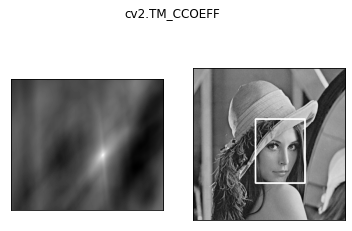

5


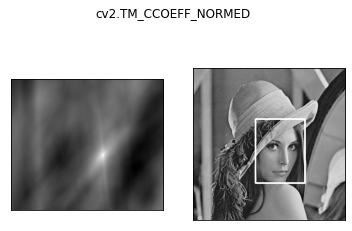

2


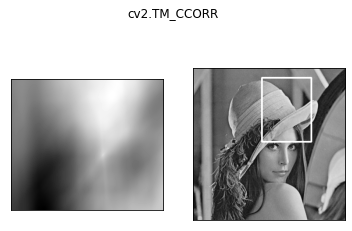

3


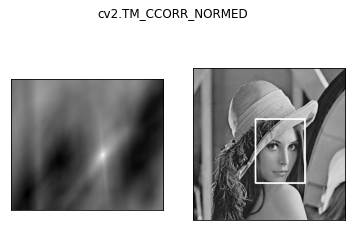

0


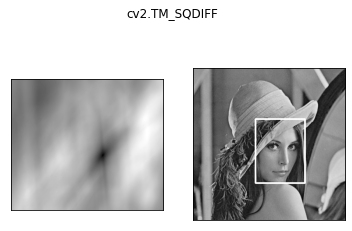

1


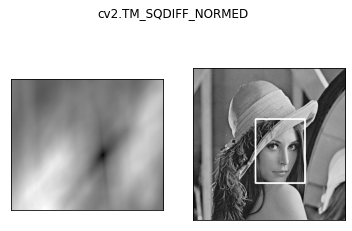

In [93]:
for meth in methods:
    img2 = img.copy()
    
    # 匹配方法的真值
    method = eval(meth)
    print(method)
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    # 如果是平方差匹配TM_SQDIFF或者TM_SQDIFF_NORMED，取最小值
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_left = (top_left[0] + w,top_left[1] + h)
    
    # 画矩形
    cv2.rectangle(img2,top_left,bottom_left,255,2)
    plt.subplot(121)
    plt.imshow(res,cmap='gray')
    # 隐藏坐标轴
    plt.xticks([])
    plt.yticks([])
    
    plt.subplot(122)
    plt.imshow(img2,cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.suptitle(meth)
    plt.show()
    

In [103]:
## 匹配多个对象
img_rgb = cv2.imread('mario.jpg')
img_gray = cv2.cvtColor(img_rgb,cv2.COLOR_BGR2GRAY)
template = cv2.imread('mario_coin.jpg',cv2.IMREAD_GRAYSCALE)
template.shape

(27, 16)

In [104]:
h, w = template.shape[:2]
h, w

(27, 16)

In [107]:
res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
threshold = 0.8

# 取匹配程度大于80%的坐标
loc = np.where(res >= threshold)
print(loc)
for pt in zip(*loc[::-1]):
    print(pt)
    bottom_right = (pt[0] + w, pt[1] + h)
    cv2.rectangle(img_rgb,pt,bottom_right,(0,0,255),2)
cv_show(img_rgb,'img_rgb')


(array([ 40,  40,  40,  40,  40,  40,  40,  40,  40,  40,  41,  41,  41,
        41,  41,  41,  41,  41,  41,  41,  41,  41,  41,  41,  41,  42,
        42,  42,  42,  42,  42,  42,  42,  42,  42,  42,  42,  42,  42,
        43,  43,  43,  43,  43,  72,  72,  72,  72,  72,  72,  72,  72,
        72,  72,  72,  72,  72,  73,  73,  73,  73,  73,  73,  73,  73,
        73,  73,  73,  73,  73,  73,  73,  73,  73,  73,  73,  73,  73,
        74,  74,  74,  74,  74,  74,  74,  74,  74,  74,  74,  74,  74,
        74,  74,  74,  74,  74,  74,  74,  75,  75,  75,  75,  75,  75,
        75, 104, 105, 105, 105, 105, 105, 105, 105, 106, 106, 106, 106,
       106, 106, 106], dtype=int64), array([ 69,  70,  83,  84,  97,  98, 111, 112, 125, 126,  68,  69,  70,
        82,  83,  84,  96,  97,  98, 110, 111, 112, 124, 125, 126,  68,
        69,  70,  82,  83,  84,  96,  97,  98, 110, 111, 112, 125, 126,
        69,  83,  97, 111, 125,  54,  55,  69,  83,  84,  97,  98, 111,
       112, 125, 126, 139,